## Solutions to some questions I've been asked in various interviews

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1

Taken from https://leetcode.com/discuss/interview-question/391865/Facebook-Software-Engineer-Phone-Screen-Interview-Questions-or-REJECT

You will be supplied with two data files in CSV format . The first file contains statistics about various dinosaurs. The second file contains additional data. Given the following formula, speed = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * SQRT(LEG_LENGTH * g) Where g = 9.8 m/s^2 (gravitational constant)

Write a program to read in the data files from disk, it must then print the names of only the bipedal dinosaurs from fastest to slowest. Do not print any other information.


`$ cat dataset1.csv NAME,LEG_LENGTH,DIET Hadrosaurus,1.4,herbivore Struthiomimus,0.72,omnivore Velociraptor,1.8,carnivore Triceratops,0.47,herbivore Euoplocephalus,2.6,herbivore Stegosaurus,1.50,herbivore Tyrannosaurus Rex,6.5,carnivore`

`$ cat dataset2.csv NAME,STRIDE_LENGTH,STANCE Euoplocephalus,1.97,quadrupedal Stegosaurus,1.70,quadrupedal Tyrannosaurus Rex,4.76,bipedal Hadrosaurus,1.3,bipedal Deinonychus,1.11,bipedal Struthiomimus,1.24,bipedal Velociraptorr,2.62,bipedal`

In [5]:
df = pd.DataFrame

In [6]:
d1,d2 = pd.read_csv('dataset1.csv'),pd.read_csv('dataset2.csv')

The thing to note here is that there are 7 items in each file, but 2 odd ducks and a misspelling. 
- The misspelling is Velociraptorr, which needs to be fixed before the merge.
- Triceratops is only in file 1 and Deinonychus is only in file two.

If you keep those dinos in, steps with break on the NaNs where there's not joining data.

So with 6 working dinos per file, you should only need 6 items

In [5]:
d1, d2

(                NAME  LEG_LENGTH       DIET
 0        Hadrosaurus        1.40  herbivore
 1      Struthiomimus        0.72   omnivore
 2       Velociraptor        1.80  carnivore
 3        Triceratops        0.47  herbivore
 4     Euoplocephalus        2.60  herbivore
 5        Stegosaurus        1.50  herbivore
 6  Tyrannosaurus Rex        6.50  carnivore,
                 NAME  STRIDE_LENGTH       STANCE
 0     Euoplocephalus           1.97  quadrupedal
 1        Stegosaurus           1.70  quadrupedal
 2  Tyrannosaurus Rex           4.76      bipedal
 3        Hadrosaurus           1.30      bipedal
 4        Deinonychus           1.11      bipedal
 5      Struthiomimus           1.24      bipedal
 6      Velociraptorr           2.62      bipedal)

In [8]:
# Fix the Velociraptor mispelling
d2.replace(to_replace='Velociraptorr', value='Velociraptor', inplace=True)

In [9]:
d2[d2['NAME'] == 'Velociraptor'] # fixed

,NAME,STRIDE_LENGTH,STANCE
6,Velociraptor,2.62,bipedal


In [10]:
# This method safely drops Triceratops and Deinonychus with the default inner join
df = d1.merge(d2,on='NAME').copy()

In [9]:
df

,NAME,LEG_LENGTH,DIET,STRIDE_LENGTH,STANCE
0,Hadrosaurus,1.40,herbivore,1.30,bipedal
1,Struthiomimus,0.72,omnivore,1.24,bipedal
2,Velociraptor,1.80,carnivore,2.62,bipedal
3,Euoplocephalus,2.60,herbivore,1.97,quadrupedal
4,Stegosaurus,1.50,herbivore,1.70,quadrupedal
5,Tyrannosaurus Rex,6.50,carnivore,4.76,bipedal


#### the formula for speed
speed = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * SQRT(LEG_LENGTH * g) Where g = 9.8 m/s^2 (gravitational constant)

In [11]:
# set variable g
g=9.8
# create 'speed' feature
df['speed'] = ((df.STRIDE_LENGTH / df.LEG_LENGTH) -1 )* np.sqrt(df.LEG_LENGTH * g)

#### sort bipedals

In [11]:
df[df['STANCE'] == 'bipedal'].sort_values('speed',ascending=False)

,NAME,LEG_LENGTH,DIET,STRIDE_LENGTH,STANCE,speed
1,Struthiomimus,0.72,omnivore,1.24,bipedal,1.918448
2,Velociraptor,1.80,carnivore,2.62,bipedal,1.913333
0,Hadrosaurus,1.40,herbivore,1.30,bipedal,-0.264575
5,Tyrannosaurus Rex,6.50,carnivore,4.76,bipedal,-2.136513


#### Return only the names in order of speed

In [12]:

df[df['STANCE'] == 'bipedal'].sort_values('speed',ascending=False)['NAME']

1        Struthiomimus
2         Velociraptor
0          Hadrosaurus
5    Tyrannosaurus Rex
Name: NAME, dtype: object

#### Visualizing addition

add a visual linear correlation for speed to leg length, and stride length, broken out by diet

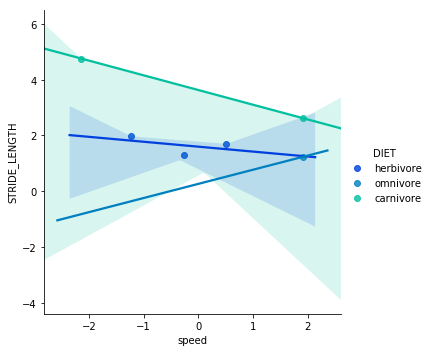

In [20]:
sns.lmplot('speed','STRIDE_LENGTH',hue='DIET',data=df,palette='winter')

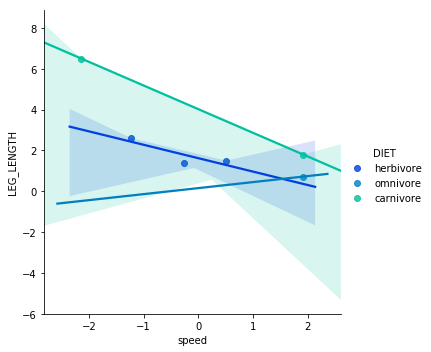

In [21]:
sns.lmplot('speed','LEG_LENGTH',hue='DIET',data=df,palette='winter')

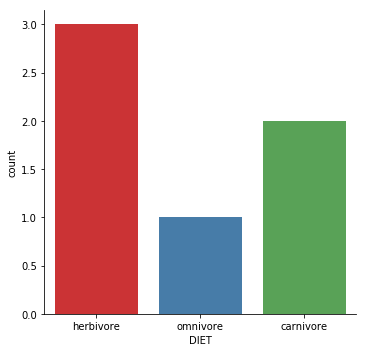

In [15]:
sns.catplot('DIET',kind='count',data=df,palette='Set1')

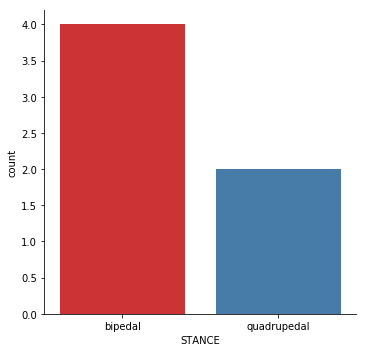

In [19]:
sns.catplot('STANCE',kind='count',data=df,palette='Set1')

### how to do this with regular python

There are a couple of minor issues in this that I missed in original solutions:
- Each file has one dino that's not in the other. In the original solution I didn't properly inner join and filter out the dino in file2 that wasn't in file1. This affects the final output.
- Velociraptor is misspelled in one of the files (Velociraptorr)

In [13]:
import math, csv

In [14]:
dinos={}
g=9.8

In [15]:
with open('dataset2.csv','r') as f:
    rows = csv.reader(f)
    for row in rows:
        NAME, STRIDE_LENGTH, STANCE = row[0], row[1],row[2]
        if NAME == 'Velociraptorr':
            NAME = 'Velociraptor'
        if STANCE == 'bipedal' and NAME in open('dataset1.csv','r').read(): # Filter out dino2 singleton
            dinos[NAME] = float(STRIDE_LENGTH)

In [16]:
with open('dataset1.csv','r') as f:
    rows = csv.reader(f)
    for row in rows:
        NAME, LEG_LENGTH, DIET = row[0], row[1], row[2]
        if NAME in dinos:
            STRIDE_LENGTH, LEG_LENGTH =  dinos[NAME], float(LEG_LENGTH)
            dinos[NAME] = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * (math.sqrt(LEG_LENGTH) * g)

In [17]:
[x[0] for x in sorted(dinos.items(), key=lambda x: x[1], reverse=True)]

['Struthiomimus', 'Velociraptor', 'Hadrosaurus', 'Tyrannosaurus Rex']

In [27]:
# or, a little cleaner:
[print(x[0]) for x in sorted(dinos.items(), key=lambda x: x[1], reverse=True)]

Struthiomimus
Velociraptor
Hadrosaurus
Tyrannosaurus Rex


[None, None, None, None]

#### As a function

In [18]:
def dinospeed(file1, file2):
    dinos = {}
    g=9.8
    with open(file2, 'r') as f:
        rows = csv.reader(f)
        for row in rows:
            NAME, STRIDE_LENGTH, STANCE = row[0], row[1],row[2]
            if NAME == 'Velociraptorr':
                NAME = 'Velociraptor'
            if STANCE == 'bipedal' and NAME in open(file1,'r').read():
                dinos[NAME] = float(STRIDE_LENGTH)
    with open(file1, 'r') as f:
        rows = csv.reader(f)
        for row in rows:
            NAME, LEG_LENGTH, DIET = row[0], row[1],row[2]
            if NAME in dinos:
                STRIDE_LENGTH, LEG_LENGTH =  dinos[NAME], float(LEG_LENGTH)
                dinos[NAME] = ((STRIDE_LENGTH / LEG_LENGTH) - 1) * (math.sqrt(LEG_LENGTH) * g)
    return [x[0] for x in sorted(dinos.items(), key=lambda x: x[1], reverse=True)]

In [19]:
dinospeed('dataset1.csv','dataset2.csv')

['Struthiomimus', 'Velociraptor', 'Hadrosaurus', 'Tyrannosaurus Rex']

### Problem 2:
**Given an array of integers greater than zero, find if it is possible to split it in two subarrays (without reordering the elements), such that the sum of the two subarrays is the same. Print the two subarrays.**

I calculated rightSum initially by using sum(nums), then looped over nums, and added nums[i] to leftSum, and subtracted it from rightSum, then checked if there was a match and printed that.

In [20]:
import random

In [21]:
myarr = [random.randint(1,4096) for x in range(10)]

In [22]:
m = int(len(myarr)/2)

In [23]:
left = myarr[:m]
right = myarr[m:]

In [24]:
sum(left) == sum(right)

False

In [28]:
def splitArraysSame(arr):
    """
    This only covers the case for an even split of the elements
    """
    m = int(len(arr)/2)
    left = arr[:m]
    right = arr[m:]
    return sum(left) == sum(right)

In [29]:
# loop through - compare x + loop
for x in range(0,len(myarr) -1):
    print(sum(myarr[:x]) == sum(myarr[x:]))

False
False
False
False
False
False
False
False
False


#### as a function

In [30]:
def iterateArraySame(arr):
    """
    This works.
    """
    p=0
    for x in range(0,len(arr) -1):
        if sum(arr[:x]) == sum(arr[x:]):
            p+=1
    if p>0:
        return True
    else:
        return False


In [31]:
iterateArraySame(myarr)

False

#### in a lambda

In [32]:
def lambdaEqualChunk(arr):
    return set(list(map(lambda xxx: arr[:xxx] == arr[xxx:], arr)))

In [33]:
lambdaEqualChunk(myarr)

{False}

### Problem 3
**Battleship/LandMines**

There is a matrix with . and X, where X represents battleship, always of length 3. Battleship can be vertical or horizontal, never diagonal. Given a function bomb_at(i,j), returns True if battleship is present at (i,j) in the matrix. Print the head, middle, tail coordinates of the battleship.

In [34]:
# test harness
matrix = [['.','.','.','.','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','.','.']]

In [35]:
matrix

[['.', '.', '.', '.', '.'],
 ['.', '.', '.', 'X', '.'],
 ['.', '.', '.', 'X', '.'],
 ['.', '.', '.', 'X', '.'],
 ['.', '.', '.', '.', '.']]

In [36]:
import itertools

In [37]:
# test the iterator
battleship={}
for i, j in itertools.product(range(5), range(5)):
    if matrix[i][j] == 'X':
        battleship[i]=j
print(battleship)
    

{1: 3, 2: 3, 3: 3}


In [38]:
# use the notion of a bomb for a hit on a battleship
# create a test function bomb_at
def bomb_at(mat,i,j):
    if mat[i][j] =='X':
        return True
    

In [39]:
# 
size=len(matrix)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(matrix,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4:
    print(bombs)
    

[(1, 3), (2, 3), (3, 3)]


In [40]:
# test harness for no bombs
matrix1= [['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.']]

In [41]:
# test harness for too many bombs
matrix2= [['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','.','.']]

In [42]:
# test harness for too few bombs
matrix3= [['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','X','.'],['.','.','.','X','.'],['.','.','.','.','.']]

In [43]:
# test harness for horizontal bombs
matrix4= [['X','X','X','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.'],['.','.','.','.','.']]

In [44]:
# test harness for diagonal bombs - this should break
matrix5= [['X','.','.','.','.'],['.','X','.','.','.'],['.','.','X','.','.'],['.','.','.','.','.'],['.','.','.','.','.']]

In [45]:
mat = matrix5
size=len(mat)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(mat,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4:
    print(bombs)
else:
    print("no bombs or wrong number of bombs")

[(0, 0), (1, 1), (2, 2)]


In [46]:
# extend to show no or some bombs
# this breaks (shows) diagonals
mat = matrix
size=len(mat)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(mat,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4:
    print(bombs)
elif len(bombs) > 0 and len(bombs) < 3:
    print('not enough bombs to matter')
elif len(bombs) > 3:
    print('too many bombs to worry about')
else:
    print("no bombs")

[(1, 3), (2, 3), (3, 3)]


In [47]:
# test harness
vert = [(1, 3), (2, 3), (3, 3)]
horz = [(0, 0), (0, 1), (0, 2)]
diag = [(0, 0), (1, 1), (2, 1)]

In [48]:
def notdiag(arr):
    """
    if vertical or horizontal, a set of either x or y should == 1.
    if diag both sets are > 1
    """
    return len(set([x[0] for x in arr])) == 1 or  len(set([x[1] for x in arr])) == 1

In [49]:
# fix to not return diagonals
mat = matrix
size=len(mat)
bombs=[]
for i, j in itertools.product(range(size), range(size)):
    if bomb_at(mat,i,j):
        bombs.append((i,j))
if len(bombs) > 2 and len(bombs) < 4 and notdiag(bombs):
    print(bombs)
elif len(bombs) > 0 and len(bombs) < 3:
    print('not enough bombs to matter')
elif len(bombs) > 3:
    print('too many bombs to worry about')
else:
    print("no vertical or horizontal bombs")

[(1, 3), (2, 3), (3, 3)]


In [50]:
bombs

[(1, 3), (2, 3), (3, 3)]

### Problem 4
**Take the filenames like anakin_2010-02-18.csv and create a directory structure like so:**

2010/02/18/starwars/

then move the file into it.

There are two classes - starwars and futurama

In [51]:
import os, sys
from shutil import copyfile

In [52]:
ls| tail -10

dinos.py
facebook_interview_problems.ipynb
fb_problem
homework/
homework.tar.gz
instructions.txt
interview_problems.ipynb
logfile.log
moby_dick.txt
speed_calc.py


In [53]:
futurama = ['hermes','nibbler','farnsworth','bender','leela']
starwars = ['jarjar','yoda','anakin','han','obiwan']

In [54]:
files = os.listdir()
cwd = os.getcwd()

In [55]:
charnames = set([x.split('_')[0] for x in files])

In [56]:
charnames

{'.git',
 '.ipynb',
 '2009',
 '2010',
 '2011',
 '2014',
 'README.md',
 'Untitled.ipynb',
 'dataset1.csv',
 'dataset2.csv',
 'dino',
 'dinos summarized solution in pandas.ipynb',
 'dinos workbook.ipynb',
 'dinos.py',
 'facebook',
 'fb',
 'homework',
 'homework.tar.gz',
 'instructions.txt',
 'interview',
 'logfile.log',
 'moby',
 'speed'}

In [57]:
def propname(name):
    if name in starwars:
        return 'starwars'
    else:
        return 'futurama'

In [58]:
propname('leela')

'futurama'

In [59]:
for f in files:
    chunks = f.split("_")
    dates = chunks[1].split("-")
    title = propname(chunks[0])
    dirstr = '{}/{}/{}/{}/{}/'.format(cwd,dates[0],dates[1],dates[2].strip('.csv'),title)
    os.makedirs(dirstr, exist_ok=True)
    copyfile(f,dirstr + f)

IndexError: list index out of range

In [ ]:
ls 2010/01/28/starwars/obiwan/

### Problem 5

**Make a count of all the instances of the words that exist in a textfile of Moby Dick**

This is a simple whiteboard/trueability version. I have an example about how to do proper cleaning and tokenization of words in a different notebook

In [ ]:
ls moby_dick.txt

In [ ]:
cat moby_dick.txt| head -10

In [ ]:
wordcount = {}

In [ ]:
with open('moby_dick.txt','r') as f:
    data = f.read()
    rows = data.split("\n")
    for row in rows:
        words = row.split(" ")
        for word in words:
            if word.lower() in wordcount:
                wordcount[word.lower()] +=1
            else:
                wordcount[word.lower()] = 1

In [ ]:
wordcount.items()

In [ ]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)

In [ ]:
import pandas as pd, numpy as np

In [ ]:
df10 = pd.DataFrame(wordcount.items(), columns=['word','count'])

In [ ]:
df10.head(2)

In [ ]:
# resort the 
df10 = df10.sort_values(by='count', ascending=False).head(50)

In [ ]:
df10.head()

In [ ]:
dict(list(sorted(wordcount.items(), key=lambda x: x[1], reverse=True))[:50])

#### plotting word counts

In [ ]:
# Create a dataframe with the top 50 returns, sorted by value
df30 = pd.DataFrame.from_dict(dict(list(sorted(wordcount.items(), key=lambda x: x[1], reverse=True))[:50]).items())

In [ ]:
df30.head(2)

In [ ]:
# set the column names
df30.columns = ['word','count']

In [ ]:
df30.head(2)

In [ ]:
ax = df30.plot()
ax.set_xticklabels(df30.word)
ax.set_xlabel('word')
ax.set_ylabel('count')

### Problem 6

**tail a unix file in python**

recreate UNIX tail -F in python

- create a local file called "logfile.log"

I'm doing this with the os. functions

In [ ]:
import time, os

In [ ]:
logfile = open("logfile.log",'r')

In [ ]:
logfile.seek(0, os.SEEK_END)

After starting this, run a shell command to add bytes:

for x in {1..5} do:echo $x >> logfile.log;done

In [ ]:
while True:
    line = logfile.readline()
    # add a sleep
    if not line:
        time.sleep(0.1)
        continue
    print(line)